<a href="https://colab.research.google.com/github/amanchauhan786/NIRAKSHAK-WE_INSPECT/blob/main/Crackdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

# Function to load and preprocess the image
def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)  # Apply Gaussian Blur
    return image, gray_image, blurred_image

# New section

In [ ]:
# Function to detect edges using Canny
def detect_edges(blurred_image, low_threshold=50, high_threshold=150):
    edges = cv2.Canny(blurred_image, low_threshold, high_threshold)  # Canny Edge Detection
    return edges

In [ ]:
# Function to apply thresholding
def threshold_image(blurred_image, threshold_value=100):
    _, thresh_image = cv2.threshold(blurred_image, threshold_value, 255, cv2.THRESH_BINARY)
    return thresh_image

In [ ]:
# Function to find contours of detected cracks
def find_cracks(thresh_image):
    contours, _ = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

In [ ]:
# Function to display the results
def display_results(image, edges, contours):
    # Draw contours on the original image
    output_image = image.copy()
    cv2.drawContours(output_image, contours, -1, (0, 255, 0), 2)

    # Plotting the images
    plt.figure(figsize=(15, 10))

    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Edges Detected (Canny)')
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Detected Cracks')
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

In [ ]:
# Main function to execute the entire process
def analyze_image(image_path):
    image, gray_image, blurred_image = preprocess_image(image_path)
    edges = detect_edges(blurred_image)
    thresh_image = threshold_image(blurred_image)
    contours = find_cracks(thresh_image)
    display_results(image, edges, contours)

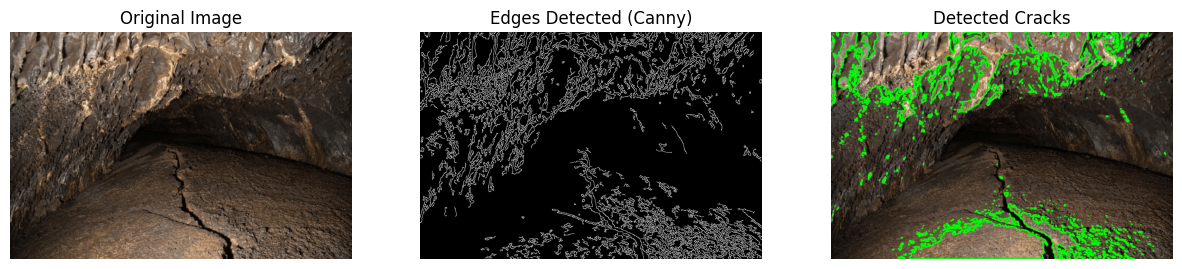

In [ ]:
# Example usage: Replace with your own image path
image_path = '/content/crack.png'  # Provide the image file path here
analyze_image(image_path)

In [ ]:
# Function to load and preprocess the image
def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)  # Apply Gaussian Blur
    return image, gray_image, blurred_image

In [ ]:
# Function to detect edges using Canny
def detect_edges(blurred_image, low_threshold=50, high_threshold=150):
    edges = cv2.Canny(blurred_image, low_threshold, high_threshold)  # Canny Edge Detection
    return edges

In [ ]:
# Function to apply thresholding
def threshold_image(blurred_image, threshold_value=100):
    _, thresh_image = cv2.threshold(blurred_image, threshold_value, 255, cv2.THRESH_BINARY)
    return thresh_image

In [ ]:
# Function to find contours and classify cracks based on their area
def classify_cracks(thresh_image):
    contours, _ = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    minor_cracks = []
    moderate_cracks = []
    severe_cracks = []

    for contour in contours:
        area = cv2.contourArea(contour)

        if area < 500:  # Small cracks
            minor_cracks.append(contour)
        elif 500 <= area < 2000:  # Medium cracks
            moderate_cracks.append(contour)
        else:  # Large cracks
            severe_cracks.append(contour)

    return minor_cracks, moderate_cracks, severe_cracks

In [ ]:
# Function to display the results with crack classification
def display_results(image, edges, minor_cracks, moderate_cracks, severe_cracks):
    output_image = image.copy()

    # Draw contours with different colors based on severity
    cv2.drawContours(output_image, minor_cracks, -1, (0, 255, 0), 2)  # Green for minor cracks
    cv2.drawContours(output_image, moderate_cracks, -1, (0, 255, 255), 2)  # Yellow for moderate cracks
    cv2.drawContours(output_image, severe_cracks, -1, (255, 0, 0), 2)  # Red for severe cracks

    # Plotting the images
    plt.figure(figsize=(15, 10))

    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Edges Detected (Canny)')
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Crack Classification')
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

    # Display crack severity analysis
    print(f"Number of Minor Cracks (Green): {len(minor_cracks)}")
    print(f"Number of Moderate Cracks (Yellow): {len(moderate_cracks)}")
    print(f"Number of Severe Cracks (Red): {len(severe_cracks)}")

In [ ]:
# Main function to execute the entire process
def analyze_image(image_path):
    image, gray_image, blurred_image = preprocess_image(image_path)
    edges = detect_edges(blurred_image)
    thresh_image = threshold_image(blurred_image)
    minor_cracks, moderate_cracks, severe_cracks = classify_cracks(thresh_image)
    display_results(image, edges, minor_cracks, moderate_cracks, severe_cracks)

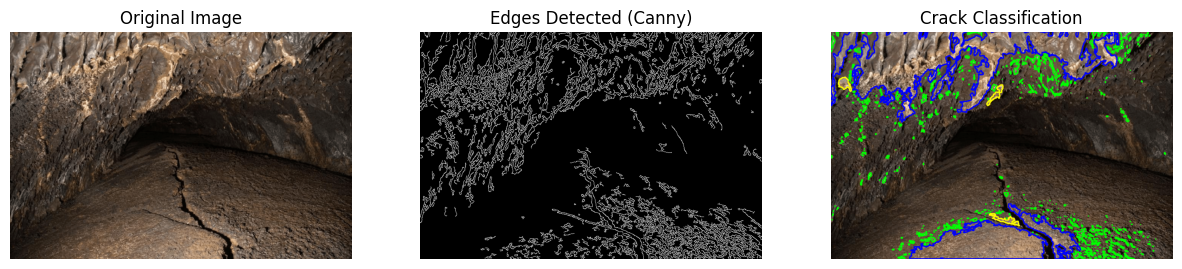

Number of Minor Cracks (Green): 515
Number of Moderate Cracks (Yellow): 3
Number of Severe Cracks (Red): 4


In [ ]:
# Example usage: Replace with your own image path
image_path ='/content/crack.png'  # Provide the image file path here
analyze_image(image_path)